In [2]:
import csv
import pandas as pd

In [3]:
set1 = pd.read_csv("D:\본선데이터셋\B_test2_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
set_src = set1[set1["ip.src"] == "172.16.0.1"]

In [ ]:
set_port = set_src[set_src["ip.dst"] == "192.168.10.50"]

In [ ]:
set_port.to_csv("test.csv")

In [ ]:
set_port1=set_port[set_port["_ws.col.Protocol"] == "TCP"]
set_port1

In [ ]:
len(set(set_port1["tcp.srcport"]))

In [ ]:
set_port["tcp.srcport"].value_counts

In [ ]:
a = set(set_port["tcp.srcport"])
a

In [ ]:
a.to_csv("port.csv")

In [ ]:
data = pd.read_csv("./test/172.16.0.1 192.168.10.50.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [ ]:
data

In [ ]:
data["_ws.col.UTCtime"] = pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds()

In [ ]:
data

In [ ]:
len(set(data["tcp.srcport"]))

In [ ]:
# load data from folders
import os
pwd = os.getcwd()
print("pwd : ", pwd)

# 폴더명을 변경해줘야 함
# folder_name = "/test1"
folder_name = "/test"
folder_path = pwd + folder_name

folder_path, folder_dirs, folder_files = next(os.walk(folder_path))
print("\nfolder_path : " ,folder_path, "\nfolder_dirs : ",folder_dirs, "\nfolder_files : ",len(folder_files))

print("START")
# start = time.time()


result = []
# ts = time.time()
for i in range(len(folder_files)):
    if i % 100 == 0:
        print((i / 100 * 100) , "   /   ",len(folder_files), " DONE")
#         print(time.time() - ts)
    temp = pd.read_csv(folder_path + "/" + folder_files[i])
    temp["_ws.col.UTCtime"] = pd.to_timedelta(temp["_ws.col.UTCtime"]).dt.total_seconds()
    a =len(set(temp["tcp.srcport"]))
    result.append(a)
print(result)
result.to_csv("srcportnum.csv")

In [ ]:
a = pd.DataFrame(result)

In [ ]:
a.to_csv("result.csv")

In [ ]:
data = data[data["_ws.col.Protocol"]=="TCP"]
a =data["tcp.srcport"]

In [ ]:
b = a.value_counts()
c = pd.DataFrame(b)

In [ ]:
d = c[c["tcp.srcport"]==4]

In [ ]:
f = pd.DataFrame(d)

In [ ]:
f

In [ ]:
f.to_csv("test01.csv")

In [ ]:
data1 = pd.read_csv("./test/172.16.0.1 192.168.10.50.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [ ]:
data2 = pd.read_csv("network_track_1st.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [ ]:
brute = pd.merge(data1, data2, how='outer')

In [ ]:
brute

In [ ]:
brute.to_csv("brute.csv")

In [ ]:
set1 = pd.read_csv("test1_1st.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [ ]:
a = set1[set1["_ws.col.Protocol"] == "TCP"]

In [ ]:
a.to_csv("tcp_test.csv")

In [ ]:
tcpdata = pd.read_csv("tcp_test.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [ ]:
portcount = tcpdata["tcp.srcport"]

In [ ]:
portcount.value_counts()

In [ ]:
grouped = tcpdata['tcp.srcport'].groupby(tcpdata['tcp.dstport']).count()

In [ ]:
grouped

In [ ]:
b = set1[set1["_ws.col.Protocol"] == "HTTP"]

In [ ]:
c = b[b["tcp.dstport"] == 80]

In [ ]:
d = c[c["ip.src"] == "172.16.0.1"]

In [ ]:
d

In [ ]:
d["tcp.srcport"]

In [ ]:
stream1 = set1[(set1['ip.src'] ==  "172.16.0.1") & (set1['ip.dst'] ==  "192.168.10.50")]
stream2 = set1[(set1['ip.src'] ==  "192.168.10.50") & (set1['ip.dst'] ==  "172.16.0.1")]

In [ ]:
stream1

In [ ]:
stream = pd.concat([stream1, stream2]).sort_index()

In [ ]:
stream

In [ ]:
stream.to_csv("./split1/brute.csv")


# 1초당 패킷개수 그림으로 그려주기

In [25]:
import os
import time
import math
import pickle
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [113]:
data = pd.read_csv(r"E:\test2_1st_filter.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [165]:
data[data['ip.src']=="13.58.225.34"]

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds


In [168]:
a = data[data['_ws.col.Protocol']=="FTP"]

In [171]:
a

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
108384,12:12:18.961007,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,185.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43938.961007
108386,12:12:19.083831,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,34.0,186.0,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43939.083831
108387,12:12:19.209281,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,23.0,220.0,57.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43939.209281
108388,12:12:19.331819,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,31.0,243.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43939.331819
108389,12:12:19.454547,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,30.0,274.0,97.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43939.454547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108560,12:12:45.860673,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,26.0,6752.0,6557.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43965.860673
108561,12:12:45.983383,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,30.0,6778.0,6605.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43965.983383
108562,12:12:46.105865,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,43.0,6808.0,6653.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43966.105865
108563,12:12:46.228961,FTP,185.170.48.239,192.168.10.51,21.0,44460.0,52.0,6851.0,6659.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43966.228961


In [170]:
a["tcp.srcport"].value_counts()

21.0    180
Name: tcp.srcport, dtype: int64

In [149]:
data["seconds"] = pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds()


In [150]:
heart = data[(data['tcp.srcport'] != 21) & (data['tcp.srcport'] != 22) & (data['tcp.srcport'] != 80)& (data['tcp.srcport'] != 443)]
heart.to_csv("heartbleed.csv", index = False)

In [151]:
heart

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
265,12:02:32.550213,TCP,173.194.66.108,192.168.10.9,465.0,1065.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43352.550213
266,12:02:34.910283,TCP,173.194.66.108,192.168.10.9,465.0,1065.0,0.0,1.0,136.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43354.910283
267,12:02:34.911700,TLSv1,173.194.66.108,192.168.10.9,465.0,1065.0,1430.0,1.0,136.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43354.911700
268,12:02:34.911748,TCP,173.194.66.108,192.168.10.9,465.0,1065.0,1430.0,1431.0,136.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43354.911748
269,12:02:34.911912,TLSv1,173.194.66.108,192.168.10.9,465.0,1065.0,719.0,2861.0,136.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43354.911912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029042,16:29:38.237347,TLSv1,173.194.204.109,192.168.10.5,465.0,52840.0,85.0,4351.0,1305.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59378.237347
3029043,16:29:38.286726,TCP,173.194.204.109,192.168.10.5,465.0,52840.0,0.0,4436.0,1379.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59378.286726
3029044,16:29:38.287278,TLSv1,173.194.204.109,192.168.10.5,465.0,52840.0,85.0,4436.0,1379.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59378.287278
3029045,16:29:38.287281,TCP,173.194.204.109,192.168.10.5,465.0,52840.0,0.0,4521.0,1379.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59378.287281


In [120]:
heart['ip.src'].value_counts()

205.174.165.73     6910
34.197.173.181     1103
23.21.34.180        988
173.194.66.109      569
74.125.22.108       394
74.125.22.109       361
209.85.201.108      338
209.85.201.109      250
173.194.206.108     248
173.194.206.109     248
209.85.144.108      219
74.125.29.108       200
209.85.144.109      197
173.194.68.108      174
173.194.68.109      173
173.194.208.108     151
173.194.205.108     149
173.194.66.108      149
173.194.208.109     126
74.125.29.109       123
74.125.192.108      122
173.194.175.109     100
209.85.232.109       99
209.85.232.108       99
173.194.205.109      99
185.170.48.239       88
172.16.0.1           77
173.194.204.108      76
173.194.204.109      75
173.194.175.108      75
173.194.207.108      50
74.125.192.109       25
173.194.207.109      25
52.6.13.28           21
52.8.53.244          14
136.243.148.161      13
52.7.235.158         11
77.238.121.220       11
Name: ip.src, dtype: int64

In [142]:
heart['tcp.dstport'].value_counts()

50379.0    1103
50380.0     988
4069.0       86
4087.0       85
4273.0       82
           ... 
58780.0       2
50512.0       2
41212.0       2
35513.0       2
56002.0       2
Name: tcp.dstport, Length: 1539, dtype: int64

In [152]:
c = heart[heart['ip.src']=="173.194.66.109"]

In [153]:
c

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
9885,12:04:10.577905,TCP,173.194.66.109,192.168.10.25,465.0,49169.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43450.577905
9886,12:04:12.110274,TCP,173.194.66.109,192.168.10.25,465.0,49169.0,0.0,1.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43452.110274
9887,12:04:12.110830,TLSv1,173.194.66.109,192.168.10.25,465.0,49169.0,1418.0,1.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43452.110830
9888,12:04:12.111054,TCP,173.194.66.109,192.168.10.25,465.0,49169.0,1418.0,1419.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43452.111054
9889,12:04:12.111103,TLSv1,173.194.66.109,192.168.10.25,465.0,49169.0,401.0,2837.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43452.111103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997353,16:21:20.796584,TLSv1,173.194.66.109,192.168.10.25,465.0,52414.0,85.0,858.0,922.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58880.796584
2997354,16:21:20.846059,TCP,173.194.66.109,192.168.10.25,465.0,52414.0,0.0,943.0,959.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58880.846059
2997355,16:21:20.846516,TLSv1,173.194.66.109,192.168.10.25,465.0,52414.0,85.0,943.0,959.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58880.846516
2997356,16:21:20.846519,TCP,173.194.66.109,192.168.10.25,465.0,52414.0,0.0,1028.0,959.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58880.846519


In [147]:
c['ip.src'].value_counts()

173.194.66.109    569
Name: ip.src, dtype: int64

In [148]:
c['ip.dst'].value_counts()

192.168.10.25    445
192.168.10.5      26
192.168.10.17     25
192.168.10.15     25
192.168.10.14     24
192.168.10.8      24
Name: ip.dst, dtype: int64

In [161]:
time = heart[(heart['seconds']>45730) & (heart['seconds']<47200)]

In [162]:
time

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
1963061,12:42:15.003514,TCP,34.197.173.181,192.168.10.15,8051.0,50379.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.003514
1963062,12:42:15.054150,TCP,34.197.173.181,192.168.10.15,8051.0,50379.0,0.0,1.0,197.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.054150
1963063,12:42:15.056260,TLSv1.2,34.197.173.181,192.168.10.15,8051.0,50379.0,1460.0,1.0,197.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.056260
1963064,12:42:15.056474,TLSv1.2,34.197.173.181,192.168.10.15,8051.0,50379.0,1420.0,1461.0,197.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.056474
1963065,12:42:15.117584,TLSv1.2,34.197.173.181,192.168.10.15,8051.0,50379.0,258.0,2881.0,290.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.117584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151948,13:06:25.666177,TCP,205.174.165.73,192.168.10.9,8080.0,1991.0,0.0,129.0,196.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47185.666177
2152245,13:06:35.669536,TCP,205.174.165.73,192.168.10.9,8080.0,1993.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47195.669536
2152246,13:06:35.670226,TCP,205.174.165.73,192.168.10.9,8080.0,1993.0,0.0,1.0,195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47195.670226
2152247,13:06:35.748275,HTTP,205.174.165.73,192.168.10.9,8080.0,1993.0,128.0,1.0,195.0,NaN,...,NaN,NaN,NaN,NaN,200.0,Ares,text/html;charset=utf-8,0.0,NaN,47195.748275


In [163]:
time['ip.src'].value_counts()

34.197.173.181     1103
23.21.34.180        988
209.85.144.109      147
209.85.144.108      144
205.174.165.73       65
74.125.22.108        50
173.194.206.108      50
173.194.206.109      48
173.194.66.109       44
173.194.175.109      25
173.194.204.109      25
173.194.204.108      25
173.194.175.108      25
74.125.22.109        24
Name: ip.src, dtype: int64

In [154]:
a = heart[heart['tcp.dstport']==50380.0]

In [155]:
a

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
1964164,12:42:15.014236,TCP,23.21.34.180,192.168.10.15,8053.0,50380.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.014236
1964165,12:42:15.065662,TCP,23.21.34.180,192.168.10.15,8053.0,50380.0,0.0,1.0,192.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.065662
1964166,12:42:15.067984,TLSv1.2,23.21.34.180,192.168.10.15,8053.0,50380.0,1460.0,1.0,192.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.067984
1964167,12:42:15.068204,TLSv1.2,23.21.34.180,192.168.10.15,8053.0,50380.0,1460.0,1461.0,192.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.068204
1964168,12:42:15.068206,TLSv1.2,23.21.34.180,192.168.10.15,8053.0,50380.0,1.0,2921.0,192.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45735.068206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965147,13:06:23.309067,TCP,23.21.34.180,192.168.10.15,8053.0,50380.0,0.0,13118.0,80106.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47183.309067
1965148,13:06:27.904754,TCP,23.21.34.180,192.168.10.15,8053.0,50380.0,0.0,13118.0,80238.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47187.904754
1965149,13:06:28.021010,TLSv1.2,23.21.34.180,192.168.10.15,8053.0,50380.0,33.0,13118.0,80238.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47188.021010
1965150,13:06:32.907796,TCP,23.21.34.180,192.168.10.15,8053.0,50380.0,0.0,13151.0,80275.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47192.907796


In [138]:
a['tcp.srcport'].value_counts()

8053.0    988
Name: tcp.srcport, dtype: int64

In [139]:
a['ip.src'].value_counts()

23.21.34.180    988
Name: ip.src, dtype: int64

In [140]:
a['ip.dst'].value_counts()

192.168.10.15    988
Name: ip.dst, dtype: int64

In [122]:
a = heart[heart['ip.src'] == "34.197.173.181"]

In [130]:
a.to_csv("34197173181.csv", index = False)

In [126]:
a['ip.dst'].value_counts()

192.168.10.15    1103
Name: ip.dst, dtype: int64

In [127]:
a['tcp.srcport'].value_counts()

8051.0    1103
Name: tcp.srcport, dtype: int64

In [128]:
a['tcp.dstport'].value_counts()

50379.0    1103
Name: tcp.dstport, dtype: int64

In [129]:
a['tcp.len'].value_counts()

0.0       699
31.0      251
804.0      74
33.0       74
1460.0      1
185.0       1
1420.0      1
258.0       1
60.0        1
Name: tcp.len, dtype: int64

In [104]:
cic = pd.read_csv(r"E:\rnddata\(최종)one_way\CIC17_Thursday_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,17,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
y = data[['_ws.col.Protocol','ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.len']]

In [106]:
n = cic[['_ws.col.Protocol','ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.len']]

In [107]:
merge1 = y.merge(e, on=['_ws.col.Protocol','ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.len'], how = 'outer', suffixes=['','_'], indicator=True )

In [108]:
merge1

,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,_merge
0,TCP,134.170.115.55,192.168.10.5,443.0,49176.0,0.0,left_only
1,TCP,134.170.115.55,192.168.10.5,443.0,49176.0,0.0,left_only
2,TCP,134.170.115.55,192.168.10.5,443.0,49176.0,0.0,left_only
3,TCP,134.170.115.55,192.168.10.5,443.0,49176.0,0.0,left_only
4,TCP,131.253.61.80,192.168.10.14,80.0,49433.0,0.0,left_only
...,...,...,...,...,...,...,...
3077766,TCP,205.174.165.73,192.168.10.9,8080.0,9654.0,0.0,right_only
3077767,TCP,205.174.165.73,192.168.10.9,8080.0,9654.0,0.0,right_only
3077768,TCP,205.174.165.73,192.168.10.9,8080.0,9665.0,0.0,right_only
3077769,TCP,205.174.165.73,192.168.10.9,8080.0,9665.0,0.0,right_only


In [109]:
merge1['_merge'].value_counts()

left_only     3032094
both            45380
right_only        297
Name: _merge, dtype: int64

In [87]:
a = cic[(cic['ip.src'] == '205.174.165.73') & (cic['ip.dst'] == '192.168.10.9')]

In [88]:
a

,_ws.col.Time,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.method,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control
2117500,13:04:13.991397,TCP,205.174.165.73,192.168.10.9,8080.0,1841.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2117501,13:04:13.993057,TCP,205.174.165.73,192.168.10.9,8080.0,1841.0,0.0,1.0,195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2117506,13:04:14.124180,HTTP,205.174.165.73,192.168.10.9,8080.0,1841.0,128.0,1.0,195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,200.0,Ares,text/html;charset=utf-8,0,NaN
2117507,13:04:14.125929,TCP,205.174.165.73,192.168.10.9,8080.0,1841.0,0.0,129.0,196.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2118619,13:04:24.131760,TCP,205.174.165.73,192.168.10.9,8080.0,1845.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692045,19:13:13.000103,TCP,205.174.165.73,192.168.10.9,8080.0,9654.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4692213,19:13:13.499901,TCP,205.174.165.73,192.168.10.9,8080.0,9654.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4771375,19:14:53.518747,TCP,205.174.165.73,192.168.10.9,8080.0,9665.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4771396,19:14:54.028509,TCP,205.174.165.73,192.168.10.9,8080.0,9665.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
b= a[a['tcp.srcport'] == 8080]

In [92]:
b.to_csv("friday_answer.csv", index =False)

In [95]:
e = b[['_ws.col.Protocol','ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.len']]

In [94]:
y = data[['_ws.col.Protocol','ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.len']]

In [96]:
merge1 = y.merge(e, on=['_ws.col.Protocol','ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.len'], how = 'outer', suffixes=['','_'], indicator=True )

In [100]:
a = merge1[merge1["_merge"] == "both"].drop_duplicates()

In [102]:
merge1["_merge"].value_counts()

left_only     3032094
both            45380
right_only        297
Name: _merge, dtype: int64

In [103]:
a.to_csv("")

,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,_merge
2124162,TCP,205.174.165.73,192.168.10.9,8080.0,1841.0,0.0,both
2124171,HTTP,205.174.165.73,192.168.10.9,8080.0,1841.0,128.0,both
2124705,TCP,205.174.165.73,192.168.10.9,8080.0,1845.0,0.0,both
2124714,HTTP,205.174.165.73,192.168.10.9,8080.0,1845.0,128.0,both
2126191,TCP,205.174.165.73,192.168.10.9,8080.0,1846.0,0.0,both
...,...,...,...,...,...,...,...
3046538,TCP,205.174.165.73,192.168.10.9,8080.0,6939.0,0.0,both
3050899,TCP,205.174.165.73,192.168.10.9,8080.0,6988.0,0.0,both
3052373,TCP,205.174.165.73,192.168.10.9,8080.0,7008.0,0.0,both
3065456,TCP,205.174.165.73,192.168.10.9,8080.0,7041.0,0.0,both


In [91]:
b['tcp.dstport'].value_counts()

4069.0    86
4087.0    85
4273.0    82
2575.0    79
2629.0    78
          ..
9509.0     3
9354.0     3
8135.0     3
7190.0     3
5488.0     3
Name: tcp.dstport, Length: 337, dtype: int64

In [70]:
data.columns

Index(['_ws.col.UTCtime', '_ws.col.Protocol', 'ip.src', 'ip.dst',
       'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq', 'tcp.ack',
       'udp.srcport', 'udp.dstport', 'udp.length', 'http.request.method',
       'http.request.uri', 'http.user_agent', 'http.connection', 'http.host',
       'http.response.code', 'http.server', 'http.content_type',
       'http.content_length', 'http.cache_control', 'seconds'],
      dtype='object')

In [67]:
answer = pd.read_csv(r"D:\본선데이터셋\result_network_1st_leejuhyun_submit1.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [71]:
answer.columns = ['ip.src', 'ip.dst','tcp.srcport', 'tcp.dstport', 'attack_type']

In [72]:
merge1 = data.merge(answer, on=['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport'], how = 'outer', suffixes=['','_'], indicator=True )

In [74]:
merge1["_merge"].value_counts()

left_only     3026658
both             6910
right_only          0
Name: _merge, dtype: int64

In [76]:
merge1[merge1["_merge"] == "both"].to_csv("answer_stream.csv", index = False)

In [66]:
data

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds


In [32]:
brute = data[(data['ip.src'] == "172.16.0.1") & (data['ip.dst'] == "192.168.10.50")]

In [40]:
answer = pd.read_csv(r"E:\rnddata\원본\A_answer_network_train_1st.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [43]:
answer.columns = ['ip.src', 'ip.dst','tcp.srcport', 'tcp.dstport', 'attack type']

In [45]:
merge = answer.merge(a, on=['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport'], how = 'outer', suffixes=['','_'], indicator=True )

In [47]:
merge[merge["_merge"] == "both"]

,ip.src,ip.dst,tcp.srcport,tcp.dstport,attack type,_merge
297,172.16.0.1,192.168.10.50,40556,80,brute force,both
298,172.16.0.1,192.168.10.50,40556,80,brute force,both
299,172.16.0.1,192.168.10.50,40556,80,brute force,both
300,172.16.0.1,192.168.10.50,40556,80,brute force,both
301,172.16.0.1,192.168.10.50,40556,80,brute force,both
302,172.16.0.1,192.168.10.50,40556,80,brute force,both
303,172.16.0.1,192.168.10.50,40556,80,brute force,both


In [58]:
a = t[['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport']]
len(a.drop_duplicates())

11

In [52]:
t = brute[brute["tcp.dstport"] == 80]
t.to_csv("1721601.csv", index=False)

In [33]:
brute

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
2826009,14:47:47.186107,TCP,172.16.0.1,192.168.10.50,40490.0,80.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53270.0
2826010,14:47:47.187058,TCP,172.16.0.1,192.168.10.50,40490.0,80.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53270.0
2826011,14:47:47.187077,HTTP,172.16.0.1,192.168.10.50,40490.0,80.0,347.0,1.0,1.0,NaN,...,/dv/,Mozilla/5.0 (X11; Linux x86_64; rv:45.0) Gecko...,keep-alive,205.174.165.68,NaN,NaN,NaN,NaN,NaN,53270.0
2826016,14:47:47.323296,TCP,172.16.0.1,192.168.10.50,40490.0,80.0,0.0,348.0,365.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53270.0
2826017,14:47:47.324306,HTTP,172.16.0.1,192.168.10.50,40490.0,80.0,356.0,348.0,365.0,NaN,...,/dv/login.php,Mozilla/5.0 (X11; Linux x86_64; rv:45.0) Gecko...,keep-alive,205.174.165.68,NaN,NaN,NaN,NaN,NaN,53270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961115,16:06:00.744609,HTTP,172.16.0.1,192.168.10.50,40628.0,80.0,347.0,1.0,1.0,NaN,...,/dv/,Mozilla/5.0 (X11; Linux x86_64; rv:45.0) Gecko...,keep-alive,205.174.165.68,NaN,NaN,NaN,NaN,NaN,57960.0
2961116,16:06:00.746436,TCP,172.16.0.1,192.168.10.50,40628.0,80.0,0.0,348.0,365.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57960.0
2961117,16:06:00.758965,HTTP,172.16.0.1,192.168.10.50,40628.0,80.0,356.0,348.0,365.0,NaN,...,/dv/login.php,Mozilla/5.0 (X11; Linux x86_64; rv:45.0) Gecko...,keep-alive,205.174.165.68,NaN,NaN,NaN,NaN,NaN,57960.0
2961118,16:06:00.801497,TCP,172.16.0.1,192.168.10.50,40628.0,80.0,0.0,704.0,1414.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57960.0


In [34]:
brute.columns

Index(['_ws.col.UTCtime', '_ws.col.Protocol', 'ip.src', 'ip.dst',
       'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq', 'tcp.ack',
       'udp.srcport', 'udp.dstport', 'udp.length', 'http.request.method',
       'http.request.uri', 'http.user_agent', 'http.connection', 'http.host',
       'http.response.code', 'http.server', 'http.content_type',
       'http.content_length', 'http.cache_control', 'seconds'],
      dtype='object')

In [37]:
a = brute[['ip.src', 'ip.dst','tcp.srcport', 'tcp.dstport']]

In [38]:
a

,ip.src,ip.dst,tcp.srcport,tcp.dstport
2826009,172.16.0.1,192.168.10.50,40490.0,80.0
2826010,172.16.0.1,192.168.10.50,40490.0,80.0
2826011,172.16.0.1,192.168.10.50,40490.0,80.0
2826016,172.16.0.1,192.168.10.50,40490.0,80.0
2826017,172.16.0.1,192.168.10.50,40490.0,80.0
...,...,...,...,...
2961115,172.16.0.1,192.168.10.50,40628.0,80.0
2961116,172.16.0.1,192.168.10.50,40628.0,80.0
2961117,172.16.0.1,192.168.10.50,40628.0,80.0
2961118,172.16.0.1,192.168.10.50,40628.0,80.0


In [39]:
a["tcp.srcport"].value_counts()

40504.0    13
40500.0    11
40490.0     9
40620.0     7
40622.0     7
40556.0     7
40628.0     7
40494.0     4
40502.0     4
40492.0     4
40626.0     4
Name: tcp.srcport, dtype: int64

In [ ]:
data = pd.read_csv(r"D:\본선데이터셋\test2_1st_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [6]:
# function_61 ==> 1초 동안 통신한 패킷 개수의 평균
def function_61(data):
    data["seconds"] = round(pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds())
    time_set = sorted(list(set(data["seconds"])))
    result = []
    for i in range(len(time_set)):
        result.append(len(data[data["seconds"] == time_set[i]]))
    print(len(result), len(time_set))
#     if len(result) == 0:
#         return 0
#     else:
#         return sum(result)/ len(result)
function_61(data)

527 527


In [ ]:
import matplotlib.pyplot as plt

162 162


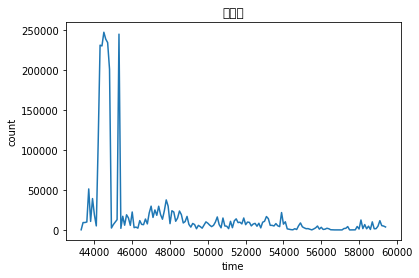

In [54]:
import os
import time
import math
import pickle
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
# my_homework ==> 1초 동안 통신한 패킷 개수. 그림그리기.
def my_homework(data):
    data["seconds"] = round(pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds(), -2)
    time_set = sorted(list(set(data["seconds"])))
    result = []
    for i in range(len(time_set)):
        result.append(len(data[data["seconds"] == time_set[i]]))
    print(len(result), len(time_set))
    x = time_set
    y = result
    plt.plot(x,y)
    plt.xlabel('time')
    plt.ylabel('count')
    plt.title('영길이')
    plt.show()
my_homework(data)

In [9]:
data.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
0,07:48:34.499147,TCP,222.104.14.117,10.89.32.47,53258.0,443.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28110.0
1,07:48:34.499948,TCP,211.179.209.170,10.89.32.66,42707.0,443.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28110.0
2,07:48:34.500350,TCP,222.104.14.117,10.89.32.47,53254.0,443.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28110.0
3,07:48:34.502320,TCP,222.104.14.117,10.89.32.47,53256.0,443.0,0.0,1.0,182.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28110.0
4,07:48:34.505378,TCP,222.104.14.117,10.89.32.47,53255.0,443.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28110.0


In [ ]:
data["seconds"] = round(pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds(), -1)


In [14]:
dos = data[(data["seconds"] >= 28270) & (data["seconds"] < 28400)]

In [15]:
dos

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
37325,07:51:05.006487,TCP,222.121.9.17,10.89.32.47,59066.0,443.0,0.0,38978.0,18962.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28270.0
37326,07:51:05.039030,TLSv1.2,222.121.9.17,10.89.32.47,59066.0,443.0,723.0,38978.0,18962.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28270.0
37327,07:51:05.044985,TLSv1.2,222.121.9.17,10.89.32.47,59068.0,443.0,725.0,35596.0,104496.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28270.0
37328,07:51:05.058295,TCP,222.121.9.17,10.89.32.47,59066.0,443.0,0.0,39701.0,19113.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28270.0
37329,07:51:05.058406,TLSv1.2,222.121.9.17,10.89.32.47,59066.0,443.0,733.0,39701.0,19113.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94657,07:53:14.253352,TCP,185.40.12.176,10.89.32.178,53449.0,3128.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28390.0
94658,07:53:14.260014,TCP,185.40.15.47,10.89.32.163,45125.0,4434.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28390.0
94659,07:53:14.266106,TCP,185.40.12.29,10.89.32.204,63245.0,4434.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28390.0
94660,07:53:14.301929,TCP,45.82.153.34,10.89.32.96,53025.0,9089.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28390.0


In [18]:
dos['ip.src'].value_counts()

222.106.53.85      9321
14.63.143.187      6837
211.48.238.50      3344
147.6.1.54         3026
211.179.209.170    2902
                   ... 
90.188.252.123        1
185.40.14.58          1
185.40.14.98          1
185.40.12.107         1
185.40.12.92          1
Name: ip.src, Length: 1223, dtype: int64

In [20]:
a =dos[dos['ip.src'] == '222.106.53.85']

In [21]:
a

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,seconds
43027,07:51:29.943541,TCP,222.106.53.85,10.89.32.47,50640.0,443.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28290.0
43029,07:51:29.948233,TCP,222.106.53.85,10.89.32.47,50642.0,443.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28290.0
43032,07:51:29.953204,TCP,222.106.53.85,10.89.32.47,50644.0,443.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28290.0
43033,07:51:29.956193,TCP,222.106.53.85,10.89.32.47,50640.0,443.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28290.0
43035,07:51:29.956645,TLSv1,222.106.53.85,10.89.32.47,50640.0,443.0,207.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92608,07:53:06.299499,TCP,222.106.53.85,10.89.32.47,33744.0,443.0,0.0,17620.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28390.0
92609,07:53:06.299753,TCP,222.106.53.85,10.89.32.47,33756.0,443.0,0.0,5554.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28390.0
92610,07:53:06.299760,TCP,222.106.53.85,10.89.32.47,33756.0,443.0,0.0,5554.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28390.0
92611,07:53:06.300648,TCP,222.106.53.85,10.89.32.47,33758.0,443.0,0.0,16092.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28390.0


In [22]:
a['ip.dst'].value_counts()

10.89.32.47    9321
Name: ip.dst, dtype: int64

In [24]:
dos = a[['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport']]
dos.to_csv("dos.csv", index=False)

# 3822.csv 시간별 패킷개수(그래프)

In [4]:
import os
import time
import math
import pickle
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r"E:\와이앤슈\NIDS\데이터셋\본선이후\A_test2_exTOin.csv",sep=',',warn_bad_lines=False, error_bad_lines=False) #

In [6]:
data['ip.src'].value_counts()

13.107.4.50       1441752
8.253.104.126      234365
192.99.204.26       72693
162.125.4.6         41393
91.189.88.162       30959
                   ...   
210.140.236.10          1
210.140.236.12          1
69.64.147.32            1
210.140.236.11          1
174.129.29.90           1
Name: ip.src, Length: 5521, dtype: int64

In [5]:
data["seconds"] = round(pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds(), -2)
time_set = sorted(list(set(data["seconds"])))
result = []
for i in range(len(time_set)):
    result.append(len(data[data["seconds"] == time_set[i]]))
print(len(result), len(time_set))

162 162


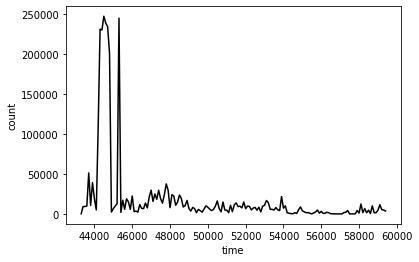

In [6]:
x = time_set
y = result
plt.plot(x,y,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

In [7]:
data1 = pd.read_csv(r"E:\와이앤슈\NIDS\데이터셋\본선이후\A_test2_inTOex.csv",sep=',',warn_bad_lines=False, error_bad_lines=False) #

In [8]:
data1['ip.src'].value_counts()

192.168.10.15    1399005
192.168.10.5      147489
192.168.10.25     143712
192.168.10.9      133371
192.168.10.12     123421
192.168.10.14     112559
192.168.10.16      96299
192.168.10.19      89488
192.168.10.17      79203
192.168.10.8       77883
192.168.10.51       4667
192.168.10.3        1469
192.168.10.50        615
Name: ip.src, dtype: int64

In [11]:
data["seconds"] = round(pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds(), -2)
time_set1 = sorted(list(set(data["seconds"])))
result1 = []
for i in range(len(time_set1)):
    result1.append(len(data[data["seconds"] == time_set1[i]]))
print(len(result1), len(time_set1))

162 162


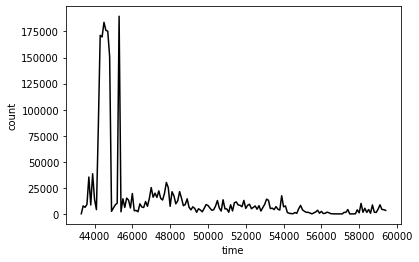

In [12]:
plt.plot(time_set1,result1,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

<B_test1_2nd_one_way.csv>

In [2]:
data = pd.read_csv(r"E:\rnddata\one_way\B_test1_2nd_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False) #

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data["seconds"] = round(pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds())
time_set = sorted(list(set(data["seconds"])))
result = []
for i in range(len(time_set)):
    result.append(len(data[data["seconds"] == time_set[i]]))
print(len(result), len(time_set))

224 224


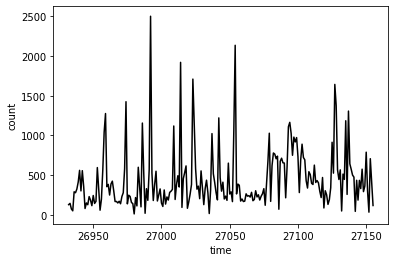

In [4]:
x = time_set
y = result
plt.plot(x,y,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

<B_train_set2_one_way.csv>

In [5]:
B_train = pd.read_csv(r"E:\rnddata\one_way\B_train_set2_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
B_train["seconds"] = round(pd.to_timedelta(B_train["_ws.col.UTCtime"]).dt.total_seconds())
time_set = sorted(list(set(B_train["seconds"])))
result = []
for i in range(len(time_set)):
    result.append(len(B_train[B_train["seconds"] == time_set[i]]))
print(len(result), len(time_set))

816 816


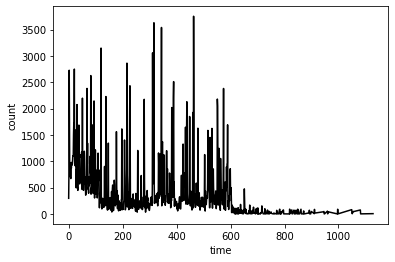

In [7]:
x = time_set
y = result
plt.plot(x,y,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

<A_attack.csv>

In [24]:
A_attack = pd.read_csv(r"E:\rnddata\(최종)공격통신_정상통신\A_attack.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
A_attack.columns

Index(['_ws.col.UTCtime', '_ws.col.Protocol', 'ip.src', 'ip.dst',
       'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq', 'tcp.ack',
       'udp.srcport', 'udp.dstport', 'udp.length', 'http.request.method',
       'http.request.uri', 'http.user_agent', 'http.connection', 'http.host',
       'http.response.code', 'http.server', 'http.content_type',
       'http.content_length', 'http.cache_control', 'seconds', 'seconds1'],
      dtype='object')

In [29]:
A_attack["seconds1"] = round(pd.to_timedelta(A_attack["_ws.col.UTCtime"]).dt.total_seconds())
time_set_attack = sorted(list(set(A_attack["seconds1"])))
result_attack = []
for i in range(len(time_set_attack)):
    result_attack.append(len(A_attack[A_attack["seconds1"] == time_set_attack[i]]))
# print(len(result), len(time_set))

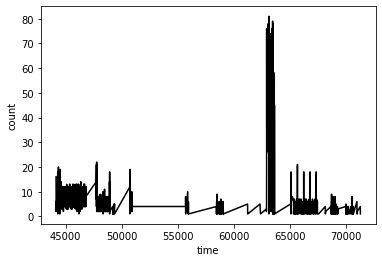

In [31]:
x = time_set
y = result
plt.plot(time_set_attack,result_attack,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

<A_train_set1_one_way.csv>

In [4]:
A_train = pd.read_csv(r"E:\rnddata\(최종)one_way\A_train_set1_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,15,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
A_train["seconds"] = round(pd.to_timedelta(A_train["_ws.col.UTCtime"]).dt.total_seconds())
time_set = sorted(list(set(A_train["seconds"])))
result = []
for i in range(len(time_set)):
    result.append(len(A_train[A_train["seconds"] == time_set[i]]))
print(len(result), len(time_set))

28333 28333


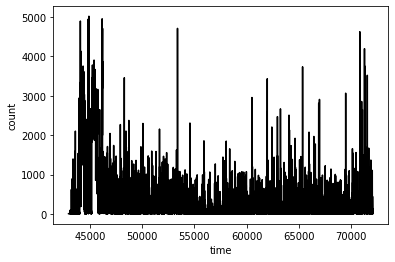

In [6]:
x = time_set
y = result
plt.plot(x,y,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

In [7]:
A_train["seconds1"] = round(pd.to_timedelta(A_train["_ws.col.UTCtime"]).dt.total_seconds(),-2)
time_set = sorted(list(set(A_train["seconds1"])))
result = []
for i in range(len(time_set)):
    result.append(len(A_train[A_train["seconds1"] == time_set[i]]))
print(len(result), len(time_set))

292 292


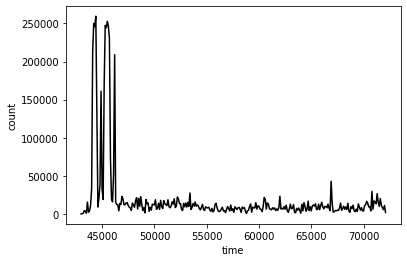

In [8]:
x = time_set
y = result
plt.plot(x,y,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

<A_test1_1st_one_way.csv>

In [10]:
A_test = pd.read_csv(r"E:\rnddata\(최종)one_way\A_test1_1st_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
A_test["seconds"] = round(pd.to_timedelta(A_test["_ws.col.UTCtime"]).dt.total_seconds(), -2)
time_set_test = sorted(list(set(A_test["seconds"])))
result_test = []
for i in range(len(time_set_test)):
    result_test.append(len(A_test[A_test["seconds"] == time_set_test[i]]))
print(len(result_test), len(time_set_test))

292 292


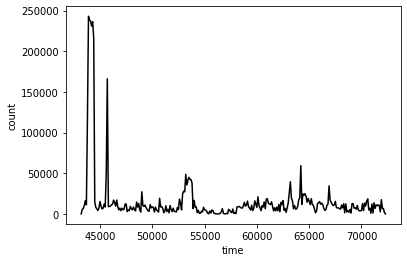

In [14]:
plt.plot(time_set_test, result_test, 'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

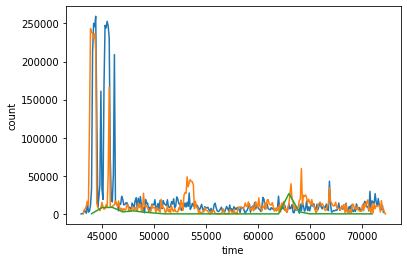

In [21]:
x = time_set
y = result
plt.plot(x,y)
plt.plot(time_set_test, result_test)
plt.plot(time_set_attack, result_attack)
plt.xlabel('time')
plt.ylabel('count')
plt.show()

In [29]:
a = A_test["seconds"]

In [28]:
b = A_train["seconds"]

In [32]:
a[a  == 45709]

1881793    45709.0
1881794    45709.0
1881795    45709.0
1881796    45709.0
1881797    45709.0
            ...   
1882055    45709.0
1882056    45709.0
1882057    45709.0
1882058    45709.0
1882059    45709.0
Name: seconds, Length: 267, dtype: float64

In [33]:
b[b == 45709]

0          45709.0
1          45709.0
2          45709.0
3          45709.0
4          45709.0
            ...   
4848530    45709.0
4848531    45709.0
4848532    45709.0
4848533    45709.0
4848534    45709.0
Name: seconds, Length: 2487, dtype: float64

In [20]:
data = pd.read_csv("3822.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [18]:
del data['seconds']

In [21]:
data.columns

Index(['_ws.col.UTCtime', '_ws.col.Protocol', 'ip.src', 'ip.dst',
       'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq', 'tcp.ack',
       'udp.srcport', 'udp.dstport', 'udp.length', 'http.request.method',
       'http.request.uri', 'http.user_agent', 'http.connection', 'http.host',
       'http.response.code', 'http.server', 'http.content_type',
       'http.content_length', 'http.cache_control'],
      dtype='object')

In [22]:
data["seconds"] = round(pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds(), -2)
time_set = sorted(list(set(data["seconds"])))
result = []
for i in range(len(time_set)):
    result.append(len(data[data["seconds"] == time_set[i]]))
print(len(result), len(time_set))

291 291


In [ ]:
type(result)

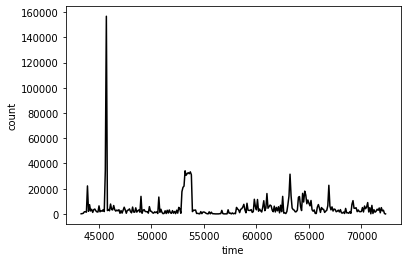

In [23]:
# fig = plt.figure()
# ax.plot(x,y, 'k')
x = time_set
y = result
plt.plot(x,y,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

In [11]:
set1 = pd.read_csv(r"E:\rnddata\one_way\A_test1_1st_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
set1[set1['tcp.dstport'] == 80]['ip.src'].value_counts()

172.16.0.1    26699
Name: ip.src, dtype: int64

In [14]:
train1 = pd.read_csv(r"E:\rnddata\one_way\A_train_set1_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,15,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
set1[set1['tcp.dstport'] == 80]['ip.src'].value_counts()

Series([], Name: ip.src, dtype: int64)

In [16]:
set2_train = pd.read_csv(r"E:\rnddata\one_way\B_train_set2_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
set2_train[set2_train['tcp.dstport'] == 443]['ip.src'].value_counts()

119.194.196.21     19484
211.179.209.170    16477
180.148.180.12     13808
121.174.158.64      8254
210.103.72.12       8235
                   ...  
59.3.247.192           3
119.192.67.103         2
168.188.32.139         2
211.195.105.130        2
119.192.53.101         1
Name: ip.src, Length: 330, dtype: int64

In [23]:
set2_test = pd.read_csv(r"E:\rnddata\one_way\B_test1_2nd_one_way.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)

In [27]:
set2_test[set2_test['tcp.dstport'] == 21]['ip.src'].value_counts()

198.108.66.120    1
Name: ip.src, dtype: int64

In [39]:
lst = [1,2,3,4,5,6,6]
df = pd.DataFrame(lst)

In [40]:
df

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,6
